Optimize the portfolio.
=====



In [1]:
from mypo import Runner, Loader
from mypo.rebalancer import MonthlyRebalancer
from mypo.optimizer import MinimumVarianceOptimizer, SharpRatioOptimizer, MaximumDiversificationOptimizer, RiskParityOptimizer
from mypo.indicator import yearly_total_return, max_drawdown, max_drawdown_span
import matplotlib.pyplot as plt

In [2]:
loader = Loader()
loader.get('VOO', 0.0003)
loader.get('EDV', 0.0007)
market = loader.get_market()

100%|██████████| 2480/2480 [00:08<00:00, 307.83it/s]


      tickers  yearly total return  max draw down  max draw down span
0  [EDV, VOO]             1.095686       0.864474                 254


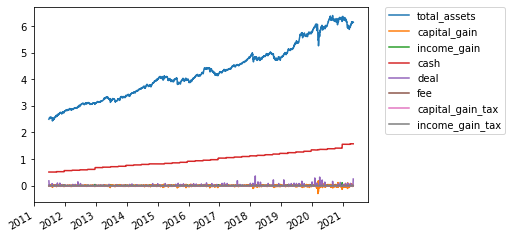

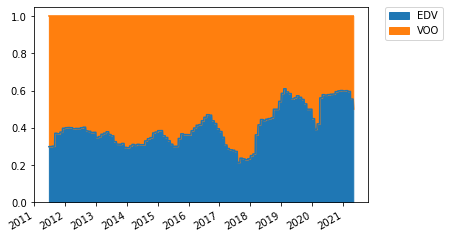

In [3]:
optimizer = MinimumVarianceOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2480/2480 [00:08<00:00, 302.72it/s]


      tickers  yearly total return  max draw down  max draw down span
0  [EDV, VOO]              1.09054       0.867817                 292


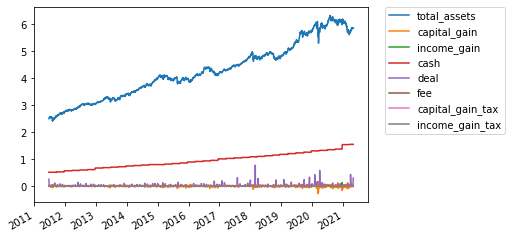

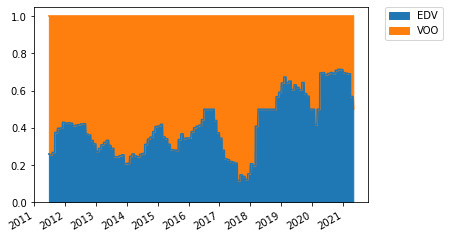

In [4]:
optimizer = MinimumVarianceOptimizer(with_semi_covariance=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True)

)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2480/2480 [00:07<00:00, 313.23it/s]


      tickers  yearly total return  max draw down  max draw down span
0  [EDV, VOO]             1.090201       0.843835                 255


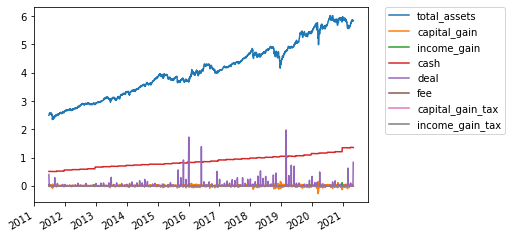

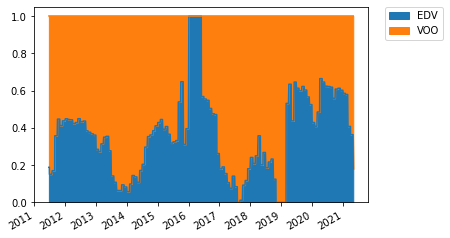

In [5]:
optimizer = SharpRatioOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

100%|██████████| 2480/2480 [00:08<00:00, 308.15it/s]


      tickers  yearly total return  max draw down  max draw down span
0  [EDV, VOO]             1.099168       0.868033                 254


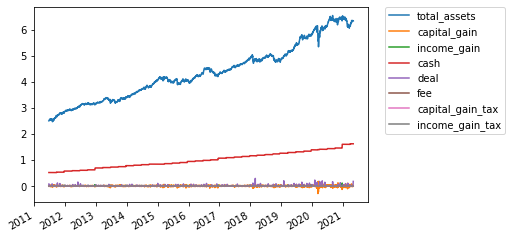

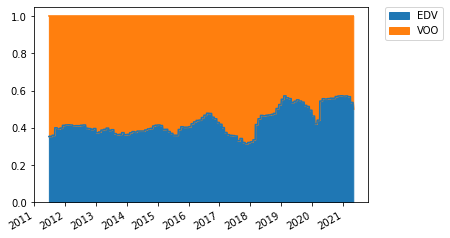

In [6]:
optimizer = MaximumDiversificationOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


100%|██████████| 2480/2480 [00:08<00:00, 301.41it/s]


      tickers  yearly total return  max draw down  max draw down span
0  [EDV, VOO]             1.099171       0.868037                 254


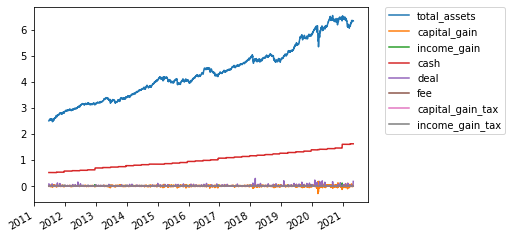

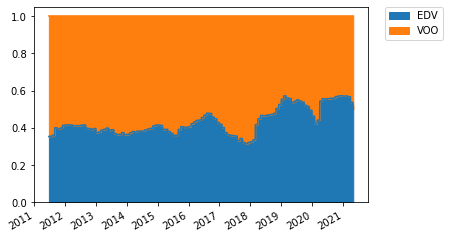

In [7]:
optimizer = RiskParityOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True)
)

runner.run(
    assets=[1.2, 0.8],
    cash=0.5,
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(report.summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()